In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [80]:
#leer la imagen
#para leer la imagen
doggos = cv2.imread('DBC.jpg')

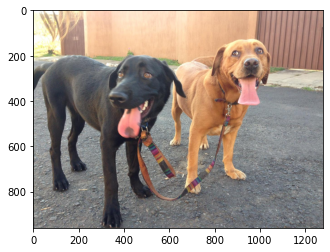

In [24]:
doggos = cv2.cvtColor(doggos, cv2.COLOR_BGR2RGB) #convertirmos de BGR a RGB
plt.imshow(doggos)
plt.show()

In [3]:
def changeColor(img,color):
    
    #transformando imagen ya cargada de BGR a RGB
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    #sanaco las dimensiones de la imagen original para crear una nueva
    alto = img.shape[0]
    ancho = img.shape[1]
    
    #creando una nueva imagen
    lienzo = np.zeros((alto, ancho, 3))
    
 
    for i in range(0, alto):
        for j in range(0, ancho):
            pixel = img[i, j]

            blue = pixel[2]
            green = pixel[1]
            red = pixel[0]
            if color == 1:
                mcolor=[blue,0, 0]
            elif color == 2:
                mcolor = [0,green, 0]
            elif color == 3:
                mcolor = [0,0, red]
            elif color == 10:
                mcolor = [0,green, red]
            elif color == 20:
                mcolor = [blue,green,0]
            else:
                mcolor = [blue,0,red]



            #hacer coincidir en el lienzo resulante, en alguno de esos canales... otros deberemos cambiarlos a 0
            lienzo [i,j] = mcolor

    cv2.imwrite("nueva.jpg", lienzo)
    new_img = cv2.imread("nueva.jpg")     

    new_img = cv2.cvtColor(new_img, cv2.COLOR_BGR2RGB)
    plt.imshow(new_img)

    return plt.show()


##  Problema 1: FUNCION changeColor(img,color)
Desarrolle una funcion la cual reciba dos parametros, una imagen y un entero llamado color

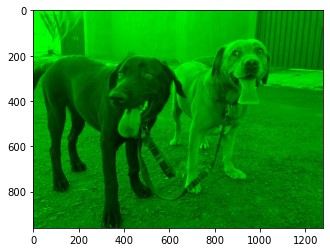

In [4]:
changeColor(doggos,2)

## Problema 2:
En el .zip del laboratorio se le compartio un conjunto de imagenes en escala de grises (imagen1,
imagen2, perro) estas imagenes fueron creadas utilizando una escala de grises en 3D, cree una
funcion que dadas las 3 imagenes se construya la imagen original a color.

## Problema 3: 
Cree una funcion que dada una imagen cree una escala de grises en tres dimensiones, tome en
cuenta que su funcion debe crear 3 imagenes como salida.

In [76]:
bruno_img = cv2.imread('bruno.jpg')

In [73]:
def D_grises(imagen):
    img1 = cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB)
    red1 = img1[:,:,0]
    green2 = img1[:,:,1]
    blue3 = img1[:,:,2]

    cv2.imwrite("roja.jpg", red1)
    cv2.imwrite("verde.jpg", green2)
    cv2.imwrite("azul.jpg", blue3)

    f, axarr = plt.subplots(1, 4 ,  figsize=(25,25))
    
    return axarr[0].imshow(img1), axarr[1].imshow(red1,cmap='gray'), axarr[2].imshow(green2, cmap='gray'), axarr[3].imshow(blue3, cmap='gray')



(<matplotlib.image.AxesImage at 0x285172d4a00>,
 <matplotlib.image.AxesImage at 0x285173082b0>)

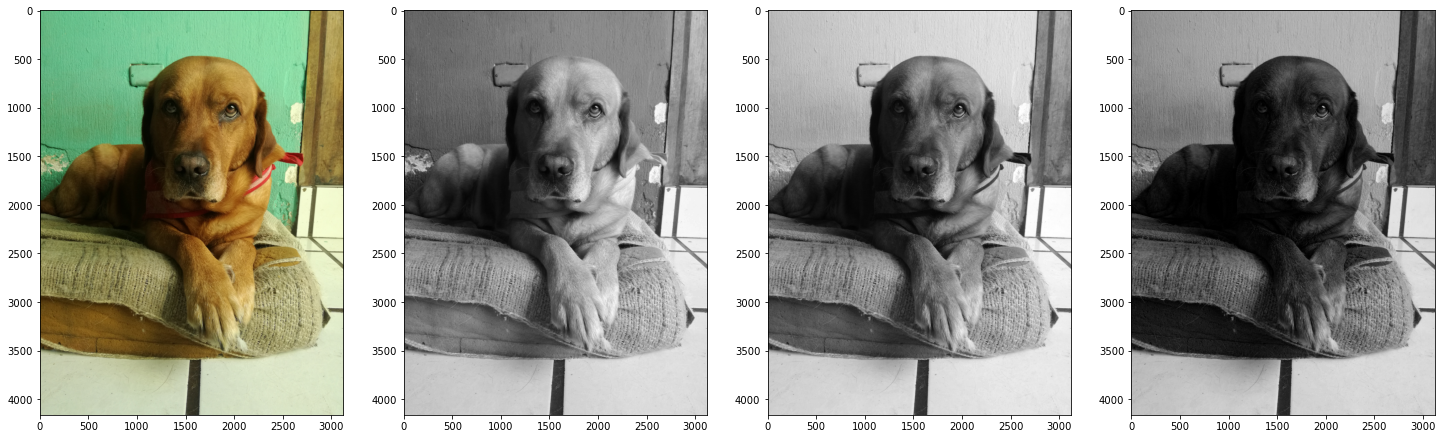

In [77]:
D_grises(bruno_img)

## Problema 4:
Cree una funcion que dada una imagen, muestre el histograma de cada canal de color y el de
escala de grises (utilice un promedio aritmetico para su escala de grises, no puede usar funciones
de opencv), sus histogramas deben incluir una lnea vertical la cual muestre el valor de la media
de la distribucion.


## Problema 5: 
    Investigue en que consiste el enfoque de escala de grises ponderado, luego de esto implemente una
funcion que dada una imagen, realice una escala de grises ponderada (notar que no existe una
solucion unica).

In [71]:
def escalaGrises(strImg):
    pict = cv2.imread(strImg, cv2.IMREAD_GRAYSCALE)
    alto = pict.shape[0]
    ancho = pict.shape[1]

    ecualizeImg=np.zeros((alto, ancho, 1)) #salida en escala de grises

    intensidades = range(0,256)
    frecuencias = np.zeros((256))

    for i in range (0, alto):
        for j in range (0, ancho):
            pixel = pict[i, j]
            frecuencias[pixel] = frecuencias[pixel] + 1

    densidad = np.true_divide(frecuencias, (alto*ancho))   #calculamos densidad

    #true_divide, división se usa esta fórmula para el arreglo de numpy
    #CDF
    cdfDensidad = np.cumsum(densidad, dtype = float)

    for i in range (0, alto):
        for j in range (0, ancho):
            pixel = pict[i, j]
            newPixel = 255*cdfDensidad[pixel] #ecualización de la imagen
            ecualizeImg[i,j] = round(newPixel, 0)



    cv2.imwrite("new_escala_grises.jpg", ecualizeImg)
    
    f, axarr = plt.subplots(1, 2, figsize=(25,25))
    
    return axarr[0].imshow(pict, cmap='gray'), axarr[1].imshow(ecualizeImg, cmap='gray')

(<matplotlib.image.AxesImage at 0x28509c1a100>,
 <matplotlib.image.AxesImage at 0x28509c47c10>)

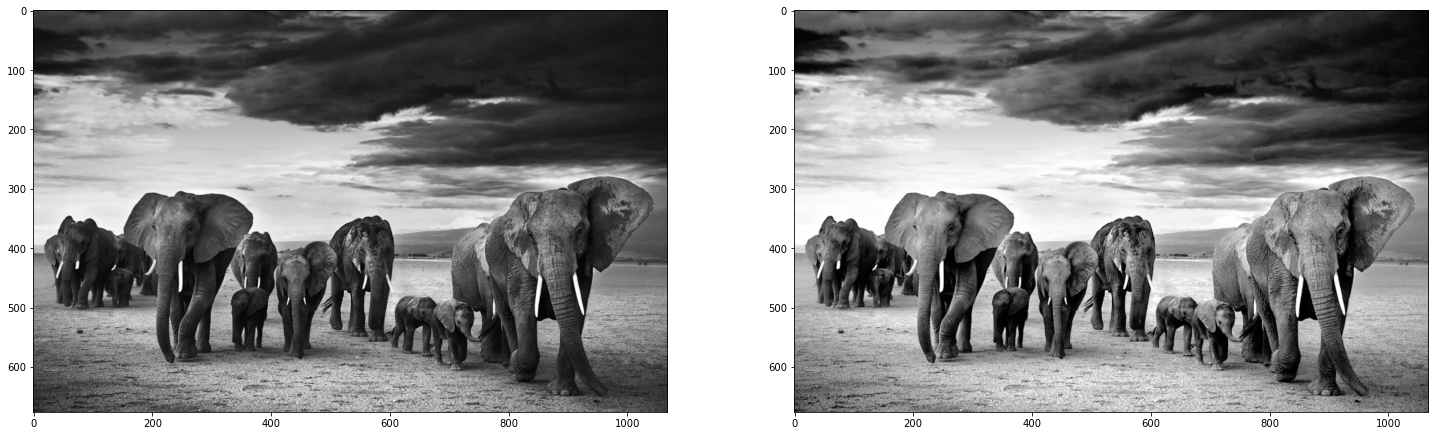

In [72]:
escalaGrises("elefantes2.jpg")

## Problema 6: 
Investigue brevemente en que consiste el espacio de color HSV y como se mapean colores a dicho
espacio, para entregar este ejercicio puede hacerlo por medio de Markdown en el mismo Notebook
donde trabajo los demas ejercicios.

Espacio de color HSV. Representación tridimensional del color basado en los componentes de tinte, matiz o tonalidad (hue, en inglés), saturación (saturation) y brillo o valor (value).
El modelo de color HSV es una transformación no lineal del modelo RGB en coordenadas cilíndricas de manera que cada color viene definido por las siguientes dimensiones:
   
    •Tinte o matiz: Ángulo que representa el matiz, normalmente definido entre 0o y 360o.
    •Saturación: Nivel saturación del color, dado entre 0 y 1, 0 representa sin saturación alguna (blanco), hasta 1 que sería el matiz en toda su intensidad. Es común también darlo en percentiles 0%-100%.
    • Brillo: Nivel del brillo entre 0 y 1. 0 es negro; 1, blanco. Al igual que la saturación puede darse en porcientos entre 0% y 100%. De esta forma el 50% indica el nivel medio o normal del brillo del color.

El matiz, al ser una representación circular, ha sido estructurada según la predominancia de una componente de color RGB. Por ejemplo, esta es la representación anular del tinte:
Ajustando a valores "normales" el brillo y la saturación, es decir 100% y 50% respectivamente.
Las amplitudes para cada tonalidad de color abarcan 120o. Por ejemplo los rojizos (255,0,0) se disponen a ambos lados de 0o, mientras los verdes (0,255,0) lo hacen alrededor de 120o y por último los tonos azules (0,0,255) se distribuyen alrededor de 240o.

Diferencias con HSL
Aunque los espacios HSV y HSL son transformaciones en coordenadas cilíndricas del modelo RGB y sus vectores sean muy similares, hay diferencias en la formulación de sus componentes desde el mismo color RGB que se traducen en cambios sustanciales. El principal elemento diferencial que se alude es el hecho de que en HSV la luminancia y la saturación son muy interdependientes, sucediendo que el mínimo nivel de saturación no produce el gris equivalente sino un color blanco que le resta el valor de intuitividad a la saturación.


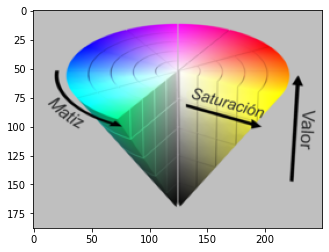

In [81]:
hsv = cv2.imread("hsv.png")
plt.imshow(hsv)
plt.show()